In [38]:
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
from math import e

In [39]:
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 2410

In [40]:
XY,C  = datasets.make_classification(n_features=2,n_clusters_per_class=1,n_redundant=0,n_samples=samples, random_state=seed,  )

In [41]:
from sklearn.model_selection import train_test_split
XY_train, XY_test, C_train, C_test = train_test_split(XY, C, test_size=0.2, random_state=0)

In [42]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def standardize(x):
    for i in range(shape(x)[1]):
        x[:,i] = (x[:,i] - np.mean(x[:,i]))/np.std(x[:,i])

XY_train = norm(XY_train)
XY_test = norm(XY_test)
C_train = norm(C_train)
C_test = norm(C_test)

In [82]:
def sigmoid(x):
    beta = 1
    return (1/(1+np.exp(-beta*x)))

class LogisticRegression:

    def initialize(self,X):
        theta = np.zeros((np.shape(X)[1]+1,1))
        X = np.c_[np.ones((np.shape(X)[0],1)),X]
        return theta,X
    
    def fit(self, X, y, learning_rate=0.001, iterations=400):
        
        theta,X = self.initialize(X)
  
        def cost(theta_in):
            z = np.dot(X,theta_in)
            cost0 = y.T.dot(np.log(sigmoid(z)))
            cost1 = (1-y).T.dot(np.log(1-sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        
        cost_list = np.zeros(iterations,)
        
        for i in range(iterations):
            m23 = (sigmoid(X @ theta)) @ ((1 - sigmoid(X @ theta)).T @ X)
            error = y.reshape(y.shape[0],1)
            theta = -learning_rate * (error.T @ m23)
            theta = theta.reshape(3,1)
            print(theta)
            cost_list[i] = cost(theta)
        self.theta = theta
        return cost_list

In [83]:
obj1 = LogisticRegression()
model= obj1.fit(XY_train,C_train)


[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8

C:\Users\Rafal\AppData\Local\Temp\ipykernel_7580\1080693246.py:3: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-beta*x)))
C:\Users\Rafal\AppData\Local\Temp\ipykernel_7580\1080693246.py:18: RuntimeWarning: divide by zero encountered in log
  cost0 = y.T.dot(np.log(sigmoid(z)))


[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8.04945797e-261]]
[[-466.576     ]
 [-289.36343306]
 [-229.07115232]]
[[-1.63952722e-260]
 [-1.01681018e-260]
 [-8

In [77]:
obj1.theta

array([[-1.63952722e-260],
       [-1.01681018e-260],
       [-8.04945797e-261]])

In [9]:
learnig_rate = 0.01
n_iter = 100

weights = np.array([[0.],[0.],[0.]])

ones = np.ones(XY_train.shape[0]) 
XY_train_new = np.c_[np.ones((np.shape(XY_train)[0],1)),XY_train]

#1 czesc
#np.dot(C_train,XY_train_new)


#2 czesc
#sigmoid(XY_train_new @ weights)

#3czesc
#((1 - sigmoid(XY_train_new @ weights)).T @ XY_train_new)
 
#2 i 3    
m23 = (sigmoid(XY_train_new @ weights)) @ ((1 - sigmoid(XY_train_new @ weights)).T @ XY_train_new)
print(m23.shape)

error = C_train.reshape(C_train.shape[0],1) - sigmoid(ones.reshape(ones.shape[0],1)) 
print(error.shape)

theta = error.T @ m23

(1928, 3)
(1928, 1)


>0 f([-0.07128717]) = 0.00508
>1 f([-0.05702973]) = 0.00325
>2 f([-0.04562379]) = 0.00208
>3 f([-0.03649903]) = 0.00133
>4 f([-0.02919922]) = 0.00085
>5 f([-0.02335938]) = 0.00055
>6 f([-0.0186875]) = 0.00035
>7 f([-0.01495]) = 0.00022
>8 f([-0.01196]) = 0.00014
>9 f([-0.009568]) = 0.00009
>10 f([-0.0076544]) = 0.00006
>11 f([-0.00612352]) = 0.00004
>12 f([-0.00489882]) = 0.00002
>13 f([-0.00391905]) = 0.00002
>14 f([-0.00313524]) = 0.00001
>15 f([-0.00250819]) = 0.00001
>16 f([-0.00200656]) = 0.00000
>17 f([-0.00160524]) = 0.00000
>18 f([-0.0012842]) = 0.00000
>19 f([-0.00102736]) = 0.00000
>20 f([-0.00082189]) = 0.00000
>21 f([-0.00065751]) = 0.00000
>22 f([-0.00052601]) = 0.00000
>23 f([-0.00042081]) = 0.00000
>24 f([-0.00033664]) = 0.00000
>25 f([-0.00026932]) = 0.00000
>26 f([-0.00021545]) = 0.00000
>27 f([-0.00017236]) = 0.00000
>28 f([-0.00013789]) = 0.00000
>29 f([-0.00011031]) = 0.00000


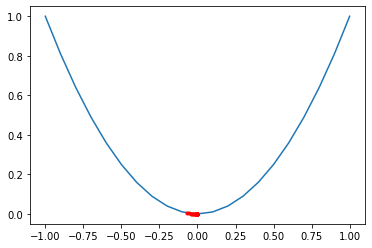

In [10]:

# example of plotting a gradient descent search on a one-dimensional function
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

Iteration 1: Cost 4352.088931274409, Weight         0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight         1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight         1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight         1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight         1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight         1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight         1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight         1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight         1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight         1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.6408

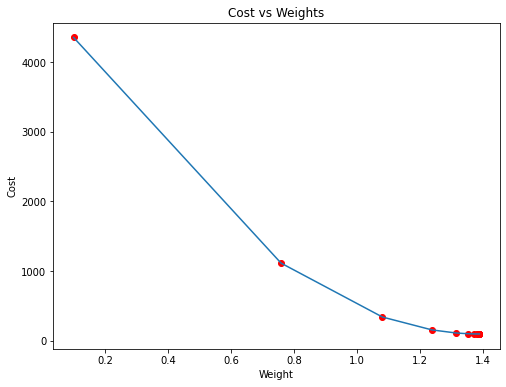

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


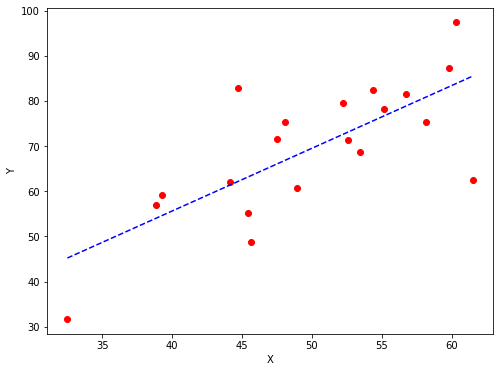

In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 
 
def main():
     
    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
 
    # Estimating weight and bias using gradient descent
    estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")
 
    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + eatimated_bias
 
    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
 
     
if __name__=="__main__":
    main()

In [12]:
from sklearn import datasets, linear_model, metrics, preprocessing
(X, y) = datasets.make_blobs(n_samples=1000, n_features=2, centers=2,cluster_std=1.5, random_state=1)

In [13]:
X


array([[-3.75777913,  4.5291416 ],
       [-7.91575179, -3.61404891],
       [ 2.88672576,  5.64336681],
       ...,
       [-2.04803419,  4.69042967],
       [-1.86422702,  4.22790859],
       [-9.86565836, -5.06598889]])

In [14]:
y

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [15]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y = make_classification(n_features=4)


In [16]:
y

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])